In [20]:
import numpy as np
import matplotlib.pyplot as plt
import HOHWM

It shows that we should not use the collcation points as the points we calculate the error. The approximation will behave misleadingly well at these points.

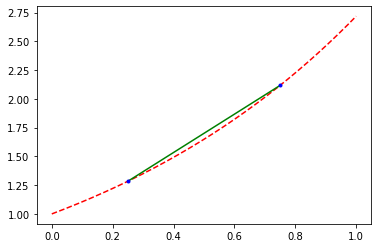

Error at collocation points = [0. 0.] 
number of collocation points= 2


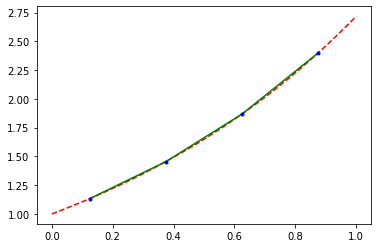

Error at collocation points = [0.00000000e+00 0.00000000e+00 2.22044605e-16 4.44089210e-16] 
number of collocation points= 4


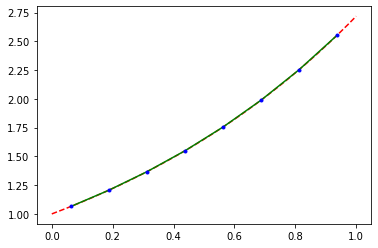

Error at collocation points = [2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 4.44089210e-16 2.22044605e-16 4.44089210e-16 0.00000000e+00] 
number of collocation points= 8


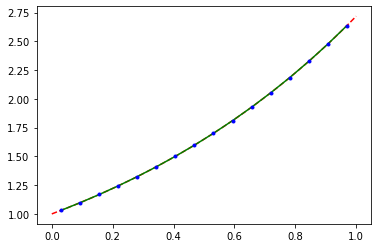

Error at collocation points = [2.22044605e-16 0.00000000e+00 0.00000000e+00 2.22044605e-16
 2.22044605e-16 2.22044605e-16 0.00000000e+00 4.44089210e-16
 2.22044605e-16 2.22044605e-16 0.00000000e+00 4.44089210e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00] 
number of collocation points= 16


In [90]:
col_size = [1, 2, 4, 8]
err_local = np.zeros(len(col_size))
err_global = np.zeros(len(col_size))
f = lambda x: np.exp(x) + np.exp(-x)
K = lambda x, t: -np.exp(-(x + t))
u_true = lambda x: np.exp(x)
test = HOHWM.IntegralEquation(linear=True, type="Fredholm", f=f, K=K)
for M in col_size:
    u_haar_approx = test.solve(N=2*M, approx=True)
    x = HOHWM.collocation(2*M)
    # plot two graphs in one figure
    x2 = np.linspace(0, 1, 1000)
    plt.plot(x2, u_true(x2), "r--", x, u_haar_approx, "g", x, u_true(x), "b.")
    plt.show()
    u_true_vec = u_true(x)
    u_haar_approx_vec = u_haar_approx
    print("Error at collocation points =", abs(u_true_vec - u_haar_approx_vec), "\n"
          "number of collocation points=", 2 * M)